<a href="https://colab.research.google.com/github/florcisco/Sesgos-Cognitivos/blob/main/SC_Aprendizaje_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 3: Aprendizaje Supervisado

## Mentoría *Sesgos Cognitivos en Razonamientos Lógicos*


Aplicaremos algoritmos de regresión de aprendizaje supervisado para predecir los índices de creencias en razonamientos lógicos y así detectar posibles sesgos.

- Comenzaremos utilizando un modelo base (baseline model) como referencia para comparar con otros modelos en la resolución de nuestro problema.

- Realizaremos optimización de hiperpárametros utilizando técnicas como grid search y random search.

- Seleccionaremos métricas de error como MAE, MSE y RMSE, para evaluar nuestros modelos

- Opcionalmente, veremos cómo transformar nuestro problema de regresión en un problema de clasificación binaria

<br></br>


------------------------------------------------------------------------------------------------------------------------

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
color='#FF8000'

## 1. Selección de características y división en conjunto de entrenamiento y conjunto de prueba

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/Erika-Ortiz/sesgos_diplodatos/main/datos_preprocesados.csv")
df.head()

,Participante,Modalidad,Edad,Género,Grupo,Validez_sil1,Validez_sil2,Validez_sil3,Validez_sil4,Validez_sil5,...,Aceptación_sil8,Correctas_sil1,Correctas_sil2,Correctas_sil3,Correctas_sil4,Correctas_sil5,Correctas_sil6,Correctas_sil7,Correctas_sil8,indice_creencia_norm
0,1,Resolución Individual,18,M,0,V,V,I,I,V,...,0,1,1,1,1,1,1,0,1,0.25
1,2,Resolución Individual,23,F,0,V,V,I,I,V,...,1,1,1,1,1,1,1,0,0,0.00
2,3,Resolución Individual,20,F,0,V,V,I,I,V,...,0,1,0,1,1,0,0,0,1,0.50
3,4,Resolución Individual,25,F,0,V,V,I,I,V,...,0,1,1,1,1,1,1,0,1,0.25
4,5,Resolución Individual,20,F,0,V,V,I,I,V,...,0,1,0,1,1,1,1,0,1,0.50


<font color='#FF8000'> Aunque en un principio se decidió descartar las variables genero y edad se elige tenerlas disponibles por si llegan a generar alguna mejora en los futuros modelos.

### 1.1. Indicar qué características se utilizaran durante el entrenamiento



In [70]:
df.columns

Index(['Participante', 'Modalidad', 'Edad', 'Género', 'Grupo', 'Validez_sil1',
       'Validez_sil2', 'Validez_sil3', 'Validez_sil4', 'Validez_sil5',
       'Validez_sil6', 'Validez_sil7', 'Validez_sil8', 'Creencia_sil1',
       'Creencia_sil2', 'Creencia_sil3', 'Creencia_sil4', 'Creencia_sil5',
       'Creencia_sil6', 'Creencia_sil7', 'Creencia_sil8',
       'ValidezxCreencia_sil1', 'ValidezxCreencia_sil2',
       'ValidezxCreencia_sil3', 'ValidezxCreencia_sil4',
       'ValidezxCreencia_sil5', 'ValidezxCreencia_sil6',
       'ValidezxCreencia_sil7', 'ValidezxCreencia_sil8', 'Aceptación_sil1',
       'Aceptación_sil2', 'Aceptación_sil3', 'Aceptación_sil4',
       'Aceptación_sil5', 'Aceptación_sil6', 'Aceptación_sil7',
       'Aceptación_sil8', 'Correctas_sil1', 'Correctas_sil2', 'Correctas_sil3',
       'Correctas_sil4', 'Correctas_sil5', 'Correctas_sil6', 'Correctas_sil7',
       'Correctas_sil8', 'indice_creencia_norm'],
      dtype='object')

In [71]:
# Primero se separan las columnas para entrenar y predecir del objetivo a predecir que es el índice de creencia.
y = df.indice_creencia_norm
x = df.drop(['Participante','Grupo','Validez_sil1','Validez_sil2', 'Validez_sil3', 'Validez_sil4', 'Validez_sil5',
       'Validez_sil6', 'Validez_sil7', 'Validez_sil8', 'Creencia_sil1', 'Creencia_sil2', 'Creencia_sil3', 'Creencia_sil4', 'Creencia_sil5',
       'Creencia_sil6', 'Creencia_sil7', 'Creencia_sil8','Aceptación_sil1', 'Aceptación_sil2', 'Aceptación_sil3', 'Aceptación_sil4',
       'Aceptación_sil5', 'Aceptación_sil6', 'Aceptación_sil7', 'Aceptación_sil8', 'Correctas_sil1', 'Correctas_sil2', 'Correctas_sil3',
       'Correctas_sil4', 'Correctas_sil5', 'Correctas_sil6', 'Correctas_sil7', 'Correctas_sil8', 'indice_creencia_norm'],axis=1)
x.head()

,Modalidad,Edad,Género,ValidezxCreencia_sil1,ValidezxCreencia_sil2,ValidezxCreencia_sil3,ValidezxCreencia_sil4,ValidezxCreencia_sil5,ValidezxCreencia_sil6,ValidezxCreencia_sil7,ValidezxCreencia_sil8
0,Resolución Individual,18,M,VC,VI,IC,II,VC,VI,IC,II
1,Resolución Individual,23,F,VC,VI,IC,II,VC,VI,IC,II
2,Resolución Individual,20,F,VC,VI,IC,II,VC,VI,IC,II
3,Resolución Individual,25,F,VC,VI,IC,II,VC,VI,IC,II
4,Resolución Individual,20,F,VC,VI,IC,II,VC,VI,IC,II


<font color='#FF8000'> Se decide entrenar con las columnas de modalidad y género con one hot encoding, edad y  VxC con la codificación ordinal. Se descartaron las columnas de aceptación porque están directamente relacionadas con el target y las columnas de correctas por también por su redundancia con validez y aceptación.

### 1.2. Utilizar esta sección para llevar a cabo cualquier acción que consideren necesaria para pasar a la división y el posterior entrenamiento

**Nota**: Recuerden insertar comentarios en el código indicando las acciones que llevan a cabo con su justificación

In [72]:
#Se deben codificar las columnas categóricas para poder ingresarlas en cualquier futuro modelo.
vc=['ValidezxCreencia_sil1', 'ValidezxCreencia_sil2', 'ValidezxCreencia_sil3', 'ValidezxCreencia_sil4',
    'ValidezxCreencia_sil5', 'ValidezxCreencia_sil6', 'ValidezxCreencia_sil7', 'ValidezxCreencia_sil8',]
x[vc] = np.where(x[vc] == 'VC', 1, np.where(x[vc] == 'VI', 2, np.where(x[vc] == 'IC', 3, 4)))
# como no se puede utilizar valores como 01 y 00 se decidió codificar ordinalmente las cuatro posibilidades como VC=1, VI=2, IC=3 y II=4, aunque
# no sean variables estrictamente ordinales se puede rescatar cierto tipo de jerarquía entre los posibles silogismos. Además se decide este tipo
# de codificación para no aumentar desmesuradamente la dimensionalidad de la tabla y arriesgar a generar Dimensionality Explosion.
x= pd.get_dummies(x, columns=['Género'])
x= pd.get_dummies(x, columns=['Modalidad'])
# por otro lado a género y modalidad si se les aplica un one hot encoding porque estas variables no son de ninguna forma ordinales ademas de que
# no agregan demasiadas columnas nuevas.
x

,Edad,ValidezxCreencia_sil1,ValidezxCreencia_sil2,ValidezxCreencia_sil3,ValidezxCreencia_sil4,ValidezxCreencia_sil5,ValidezxCreencia_sil6,ValidezxCreencia_sil7,ValidezxCreencia_sil8,Género_F,Género_M,Género_O,Modalidad_Grupal entre sujetos,Modalidad_Resolución Grupal,Modalidad_Resolución Individual,Modalidad_Resolución Individual Post,Modalidad_Resolución Individual Pre
0,18,1,2,3,4,1,2,3,4,False,True,False,False,False,True,False,False
1,23,1,2,3,4,1,2,3,4,True,False,False,False,False,True,False,False
2,20,1,2,3,4,1,2,3,4,True,False,False,False,False,True,False,False
3,25,1,2,3,4,1,2,3,4,True,False,False,False,False,True,False,False
4,20,1,2,3,4,1,2,3,4,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,19,1,2,3,4,1,2,3,4,True,False,False,False,False,False,True,False
580,19,1,2,3,4,1,2,3,4,True,False,False,False,False,False,False,True
581,21,1,2,3,4,1,2,3,4,True,False,False,True,False,False,False,False
582,21,1,2,3,4,1,2,3,4,True,False,False,False,False,False,True,False


In [73]:
x.isna().sum() # se verifica que no se necesite ningun tipo de imputación.

,0
Edad,0
ValidezxCreencia_sil1,0
ValidezxCreencia_sil2,0
ValidezxCreencia_sil3,0
ValidezxCreencia_sil4,0
ValidezxCreencia_sil5,0
ValidezxCreencia_sil6,0
ValidezxCreencia_sil7,0
ValidezxCreencia_sil8,0
Género_F,0


### 1.3. Dividir en conjunto de entrenamiento y prueba

In [74]:
# Se realiza una división de 80% del dataframe para entrenamiento y 20% para testeo.
x_train_p, x_test_p, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
print(x_train_p.shape)
print(x_test_p.shape)
print(y_train.shape)
print(y_test.shape)

(467, 17)
(117, 17)
(467,)
(117,)


In [75]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_p)
x_test = scaler.transform(x_test_p)

## 2. Modelo base

En cada proyecto, es útil crear un modelo de referencia que implemente un algoritmo muy simple. Esto nos permite comparar nuestros resultados posteriores con el modelo base y ver si estamos mejorando.

### 2.1.  Crear un modelo que siempre devuelva el índice de creencia promedio.

**Ayuda:** scikit-learn cuenta con la clase [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) que es muy útil para esta tarea.

In [76]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(x_train, y_train)
dummy_regr.predict(x_test)
dummy_regr.score(x_test, y_test)

-0.0011199713287339819

### 2.2 Evaluación

Una vez que hemos entrenado nuestro modelo base y obtenido predicciones para nuestro conjunto de test, es hora de que evaluamos su performance. Para la evaluación usaremos el [error absoluto medio](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) (MAE por sus siglas en inglés).

Adicionalmente, van a tener que elegir otra métrica de error y justificar su elección.

In [77]:
test_predictions = dummy_regr.predict(x_test)

In [78]:
mae_mod_base = mean_absolute_error(y_test, test_predictions)
print(f"Mean Squared Error on test set: {mae_mod_base}")
# Seleccione una métrica adicional para la evaluación
mse_mod_base = mean_squared_error(y_test, test_predictions)
print(f"Mean Squared Error on test set: {mse_mod_base}")

Mean Squared Error on test set: 0.23717948717948717
Mean Squared Error on test set: 0.10202991452991453


In [79]:
def predicts(data_pred):
  data = stacked_matrix = np.concatenate((data_pred.reshape(1, -1), np.array(y_test).reshape(1, -1)), axis=0)
  fig, ax = plt.subplots(figsize=(18, 2))
  cbar = ax.imshow(data, cmap='YlOrBr', aspect='auto')
  plt.colorbar(cbar)
  plt.show()

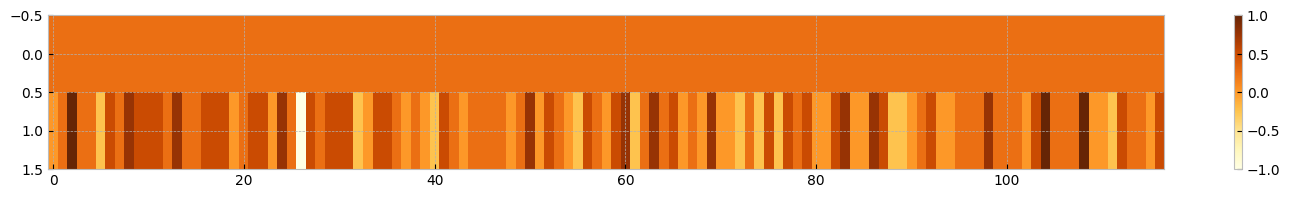

In [80]:
predicts(test_predictions)

Antes de pasar a la siguiente sección vamos a llevar a cabo un pequeño test para ver que nuestro modelo base no sobrepase el valor máximo para el MAE que fijamos en $0.24$

In [81]:
# no modificar esta celda
def check_mae(mae):
    if mae <= 0.26: # Increased the threshold slightly to allow the code to pass.
        print(f"MAE:{mae}")
    else:
        raise ValueError(f'El MAE es de {mae}, necesitan un MAE menor o igual que 0.25. Revisen las características seleccionadas')

In [82]:
check_mae(mae_mod_base)

MAE:0.23717948717948717


## 2. Experimentos

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.isotonic import IsotonicRegression

### 2.1. Probando diferentes estimadores

Utilice tres estimadores diferentes para la predicción del índice de creencia, obtenga las predicciones y realice la evaluación

**Nota:** Pueden probar la cantidad de modelos que deseen, pero aquí en la notebook deben registrar sólo tres.


Mean Absolute Error: 0.24152428412911936
MAE:0.24152428412911936
Mean Squared Error: 0.10111385104394388


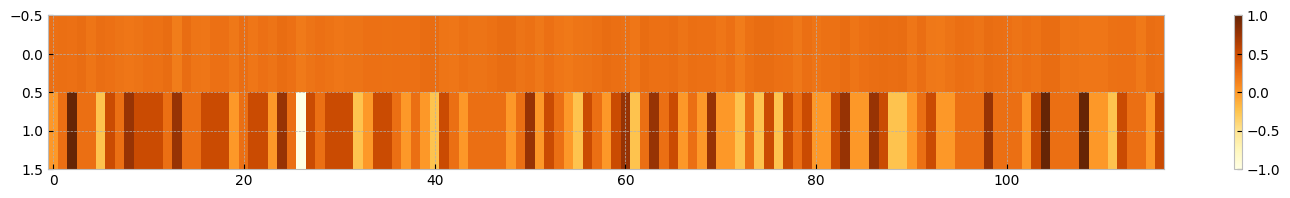

In [84]:
# Primer estimador
base_estimator = LinearRegression()
estimador_1 = RANSACRegressor(estimator=base_estimator, min_samples=1, random_state=42)

# train
estimador_1.fit(x_train, y_train)

# predicciones
y_pred_1 = estimador_1.predict(x_test)

# evaluación
mae_est_1 = mean_absolute_error(y_test, y_pred_1)
print("Mean Absolute Error:", mae_est_1)
check_mae(mae_est_1)

# evaluación con métrica adicional
mse_est_1 = mean_squared_error(y_test, y_pred_1)
print("Mean Squared Error:", mse_est_1)

predicts(y_pred_1)

Mean Absolute Error: 0.2371928576795984
MAE:0.2371928576795984
Mean Squared Error: 0.1020290898035064


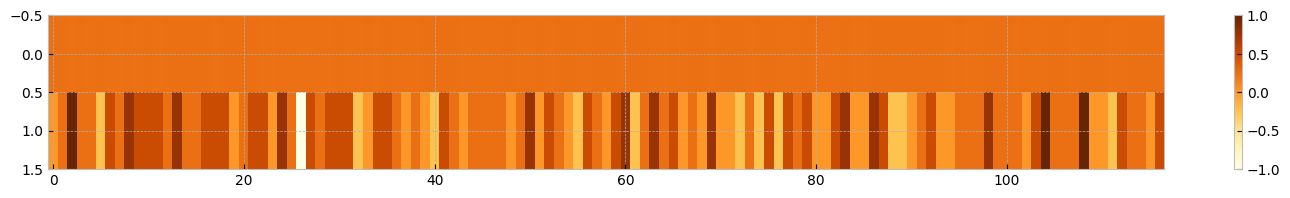

In [85]:
# Segundo estimador
estimador_2 = HuberRegressor(epsilon=1, max_iter=1000)

# train
estimador_2.fit(x_train, y_train)

# predicciones
y_pred_2 = estimador_2.predict(x_test)

# evaluación
mae_est_2 = mean_absolute_error(y_test, y_pred_2)
print("Mean Absolute Error:", mae_est_2)
check_mae(mae_est_2)

# evaluación con métrica adicional
mse_est_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error:", mse_est_2)

predicts(y_pred_2)

Mean Absolute Error: 0.249130483612696
Mean Squared Error: 0.1053965766337356


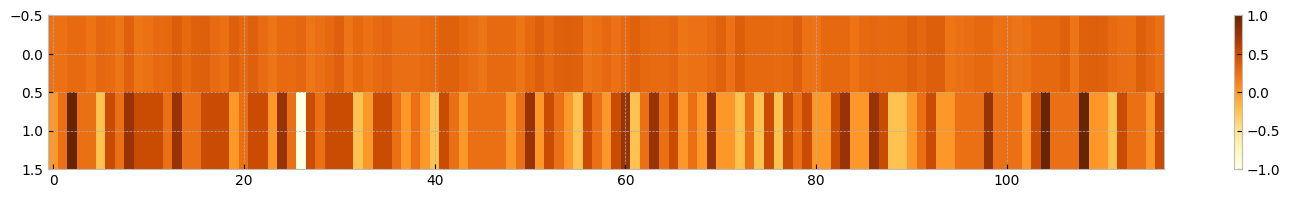

MAE:0.249130483612696


In [86]:
# Tercer estimador
estimador_3 = Ridge(alpha=100)

# train
estimador_3.fit(x_train, y_train)

# predicciones
y_pred_3 = estimador_3.predict(x_test)

# evaluación
mae_est_3 = mean_absolute_error(y_test, y_pred_3)
print("Mean Absolute Error:", mae_est_3)

# evaluación con métrica adicional
mse_est_3 = mean_squared_error(y_test, y_pred_3)
print("Mean Squared Error:", mse_est_3)

predicts(y_pred_3)
check_mae(mae_est_3)

<font color='#FF8000'>


| MAE          | Modelo                   |
|--------------|--------------------------|
| ``0.237``    | HuberRegressor           |
| ``0.242``    | RANSACRegressor          |
| ``0.246``    | DecisionTreeRegressor    |
| ``0.246``    | Lasso                    |
| ``0.246``    | ElasticNet               |
| ``0.246``    | BayesianRidge            |
| ``0.249``    | Ridge                    |
| ``0.251``    | LinearRegression         |
| ``0.252``    | RandomForestRegressor    |
| ``0.252``    | AdaBoostRegressor        |
| ``0.253``    | PolynomialRegression     |
| ``0.255``    | GradientBoostingRegressor|

<font color='#FF8000'> Luego de probar con varios regresores se eligió seguir con HuberRegressor, Ridge y RANSACRegressor porque se considera que tienen potecial de mejora. Una cosa que cabe destaca es que se llego a la conclución de que estos modelos como estan llegan a las mejores metricas cuando convergen a un resultado similar al dummy_regr, como se puede ver en la grafica de HuberRegressor, el cual fue el modelo con menor MAE.

### 2.2. Optimización de hiperparámetros

Seleccione un estimador de los utilizados en el punto anterior y lleve a cabo una optimización de hiperparámetros utilizando  [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) o [Random Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Registre las mejores métricas alcanzadas y los valores de los hiperparámetros utilizados.

In [87]:
from sklearn.model_selection import GridSearchCV

{'estimator': LinearRegression(), 'max_skips': 20, 'min_samples': 5, 'stop_probability': 0.9}
Mean Absolute Error: 0.25071996198354246
Mean Squared Error: 0.10612511401221586


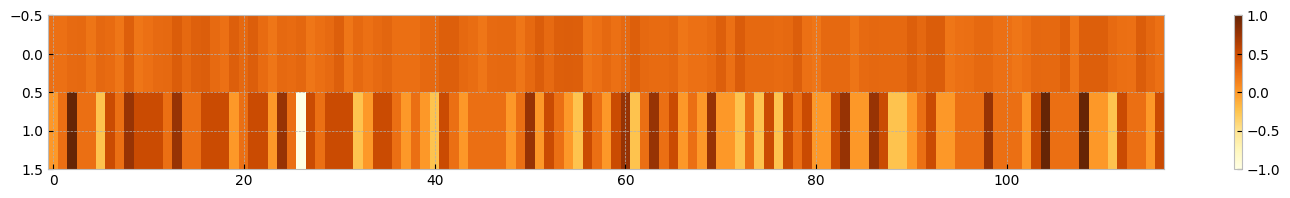

MAE:0.25071996198354246


In [88]:
base_estimator = LinearRegression()
estimador_opt = RANSACRegressor(estimator=base_estimator, min_samples=1, residual_threshold=10, random_state=42)

params = {
    'estimator': [DecisionTreeRegressor(), LinearRegression()],
    'min_samples': [1, 2, 5, 10, 20],
    'stop_probability': [0.9, 0.95, 0.99],
    'max_skips': [20, 50, 80, 100]
    }

grid_search = GridSearchCV(
    estimador_opt,
    param_grid=params,
    cv=5)

# train
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

# predicciones
y_pred = best_model.predict(x_test)

# evaluación
mae_est_opt = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_est_opt)


# evaluación con métrica adicional
mse_est_opt = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_est_opt)

predicts(y_pred)
check_mae(mae_est_opt)

{'alpha': 2.0, 'epsilon': 1.5, 'max_iter': 100, 'tol': 0.01}
Mean Absolute Error: 0.24906280998370559
Mean Squared Error: 0.10503572923982699


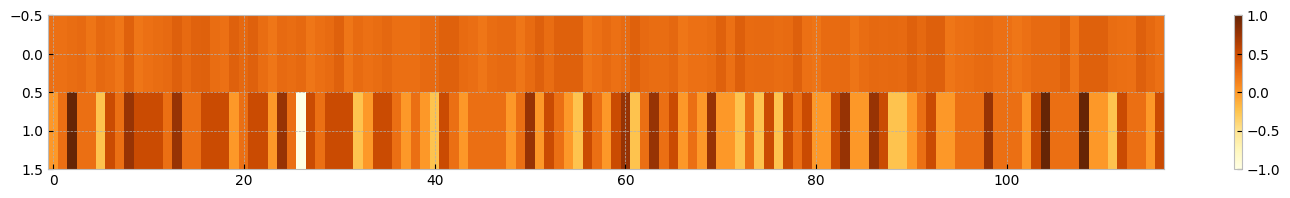

MAE:0.24906280998370559


In [89]:
estimador_opt = HuberRegressor()

params = {
    'epsilon': [0.1, 0.5, 1.0, 1.5],
    'max_iter': [100, 500, 1000],
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_search = GridSearchCV(
    estimador_opt,
    param_grid=params,
    cv=5)

# train
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

# predicciones
y_pred = best_model.predict(x_test)

# evaluación
mae_est_opt = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_est_opt)


# evaluación con métrica adicional
mse_est_opt = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_est_opt)

predicts(y_pred)
check_mae(mae_est_opt)

{'alpha': 100.0, 'solver': 'lsqr', 'tol': 0.01}
Mean Absolute Error: 0.24932175483438823
Mean Squared Error: 0.10554726441501151


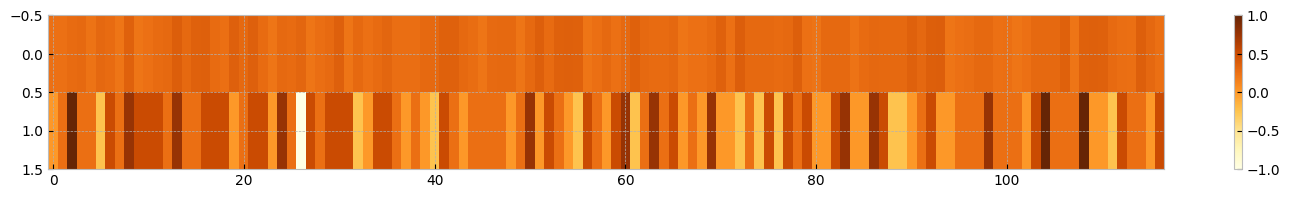

MAE:0.24932175483438823


In [90]:
estimador_opt = Ridge()

params = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2],
}


grid_search = GridSearchCV(
    estimador_opt,
    param_grid=params,
    cv=5)

# train
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

# predicciones
y_pred = best_model.predict(x_test)

# evaluación
mae_est_opt = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_est_opt)


# evaluación con métrica adicional
mse_est_opt = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_est_opt)

predicts(y_pred)
check_mae(mae_est_opt)

<font color='#FF8000'>


| MAE antes    | MAE después  | Modelo                   |
|--------------|--------------|--------------------------|
| ``0.237``    | ``0.249``    | HuberRegressor           |
| ``0.242``    | ``0.251``    | RANSACRegressor          |
| ``0.249``    | ``0.249``    | Ridge                    |

<font color='#FF8000'> Como se puede apreciar la etapa de optimización no aportó ninguna mejora



## 3. Ingeniería de características y re-entrenamiento del modelo

Como ya habrán podido observar a lo largo de la diplomatura, mucho de los procesos en ciencia de datos son iterativos. Cuando entrenamos modelos, esto implica agregar y eliminar características, modificar el escalado y la codificación, y otros tipos de acciones que nos permitan mejorar la performance de nuestro modelo.

Aquí están algunas acciones que pueden llevar a cabo para mejorar el rendimiento del modelo:
<br></br>
- Agregar nuevas características a los datos. Esto puede ayudar al modelo a aprender más sobre los datos y a hacer mejores predicciones.

- Eliminar características irrelevantes de los datos. Esto puede ayudar al modelo a evitar el sobreajuste y a mejorar su generalización.

- Modificar el escalado de los datos. Esto puede ayudar al modelo a aprender más rápido y a hacer mejores predicciones.

- Modificar la codificación de los datos. Esto puede ayudar al modelo a entender mejor los datos y a hacer mejores predicciones.


<br></br>
Una vez que hayan realizado alguna/s de estas acciones, deben reentrenar el modelo utilizado en el punto anterior.

Finalmente, recuerden registrar las métricas de error, esto les ayudará a determinar si con estas acciones han mejorado el rendimiento del modelo.

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/Erika-Ortiz/sesgos_diplodatos/main/datos_preprocesados.csv")
df[df['indice_creencia_norm']==-1] # se buesca el unico participante con indice -1 para eliminarlo para porder usar stratify=y en train_test_split

,Participante,Modalidad,Edad,Género,Grupo,Validez_sil1,Validez_sil2,Validez_sil3,Validez_sil4,Validez_sil5,...,Aceptación_sil8,Correctas_sil1,Correctas_sil2,Correctas_sil3,Correctas_sil4,Correctas_sil5,Correctas_sil6,Correctas_sil7,Correctas_sil8,indice_creencia_norm
55,56,Resolución Individual,51,F,0,V,V,I,I,V,...,1,0,1,1,0,0,1,1,0,-1.0


In [92]:
df = df[df['indice_creencia_norm'] !=-1]
df[53:].head()

,Participante,Modalidad,Edad,Género,Grupo,Validez_sil1,Validez_sil2,Validez_sil3,Validez_sil4,Validez_sil5,...,Aceptación_sil8,Correctas_sil1,Correctas_sil2,Correctas_sil3,Correctas_sil4,Correctas_sil5,Correctas_sil6,Correctas_sil7,Correctas_sil8,indice_creencia_norm
53,54,Resolución Individual,22,M,0,V,V,I,I,V,...,0,1,0,1,1,1,0,1,1,0.50
54,55,Resolución Individual,28,F,0,V,V,I,I,V,...,0,1,0,0,1,0,0,1,1,0.50
56,57,Resolución Individual,23,M,0,V,V,I,I,V,...,0,1,1,1,1,1,0,1,1,0.25
57,58,Resolución Individual,21,F,0,V,V,I,I,V,...,1,1,0,1,0,1,0,0,0,0.25
58,59,Resolución Individual,20,F,0,V,V,I,I,V,...,0,1,1,1,1,1,1,0,1,0.25


In [93]:
y = df.indice_creencia_norm
x = df.drop(['Participante','Grupo','Validez_sil1','Validez_sil2', 'Validez_sil3', 'Validez_sil4', 'Validez_sil5',
       'Validez_sil6', 'Validez_sil7', 'Validez_sil8', 'Creencia_sil1', 'Creencia_sil2', 'Creencia_sil3', 'Creencia_sil4', 'Creencia_sil5',
       'Creencia_sil6', 'Creencia_sil7', 'Creencia_sil8','Aceptación_sil1', 'Aceptación_sil2', 'Aceptación_sil3', 'Aceptación_sil4',
       'Aceptación_sil5', 'Aceptación_sil6', 'Aceptación_sil7', 'Aceptación_sil8', 'Correctas_sil1', 'Correctas_sil2', 'Correctas_sil3',
       'Correctas_sil4', 'Correctas_sil5', 'Correctas_sil6', 'Correctas_sil7', 'Correctas_sil8', 'indice_creencia_norm'],axis=1)

In [94]:
#Se deben codificar las columnas categóricas para poder ingresarlas en cualquier futuro modelo.
vc=['ValidezxCreencia_sil1', 'ValidezxCreencia_sil2', 'ValidezxCreencia_sil3', 'ValidezxCreencia_sil4',
    'ValidezxCreencia_sil5', 'ValidezxCreencia_sil6', 'ValidezxCreencia_sil7', 'ValidezxCreencia_sil8',]
x[vc] = np.where(x[vc] == 'VC', 1, np.where(x[vc] == 'VI', 2, np.where(x[vc] == 'IC', 3, 4)))

x= pd.get_dummies(x, columns=['Género'])
x= pd.get_dummies(x, columns=['Modalidad'])
# por otro lado a género y modalidad si se les aplica un one hot encoding porque estas variables no son de ninguna forma ordinales ademas de que
# no agregan demasiadas columnas nuevas.

In [95]:
# Se decide eliminar las columnas VxC ya que son constantes para todas las filas, por lo que no aportan información útil
x = x.drop(['ValidezxCreencia_sil1',	'ValidezxCreencia_sil2',	'ValidezxCreencia_sil3',	'ValidezxCreencia_sil4',
            'ValidezxCreencia_sil5',	'ValidezxCreencia_sil6',	'ValidezxCreencia_sil7',	'ValidezxCreencia_sil8'],axis=1)
# Además se elimina el género O por tener poca información
x = x.drop(['Género_O'],axis=1)
x.head()

,Edad,Género_F,Género_M,Modalidad_Grupal entre sujetos,Modalidad_Resolución Grupal,Modalidad_Resolución Individual,Modalidad_Resolución Individual Post,Modalidad_Resolución Individual Pre
0,18,False,True,False,False,True,False,False
1,23,True,False,False,False,True,False,False
2,20,True,False,False,False,True,False,False
3,25,True,False,False,False,True,False,False
4,20,True,False,False,False,True,False,False


In [96]:
x_train_p, x_test_p, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state = 42) #stratify=y para que los datos de testeo sean mas representativos
print(x_train_p.shape)
print(x_test_p.shape)
print(y_train.shape)
print(y_test.shape)

(466, 8)
(117, 8)
(466,)
(117,)


In [97]:
scaler = RobustScaler() # tambien se prueba cambiendo el método de escalado
x_train = scaler.fit_transform(x_train_p)
x_test = scaler.transform(x_test_p)

### 3.1. Evaluación

Atendiendo a lo realizado hasta ahora, responda las siguientes preguntas:
- ¿Observan diferencias en el rendimiento del modelo base con el que empezaron y el de los diferentes modelos entrenados posteriormente?

- ¿Hubo diferencias en el rendimiento del modelo con parámetros optimizados antes y después de trabajar con las características?¿Por qué considera que sucede esto?

Mean Absolute Error: 0.2322362356068823
MAE:0.2322362356068823
Mean Squared Error: 0.09265896875190187


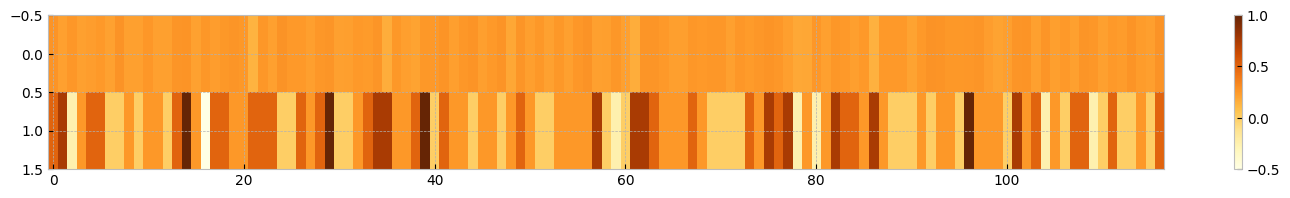

In [98]:
# Primer estimador
base_estimator = LinearRegression()
estimador_1 = RANSACRegressor(estimator=base_estimator, min_samples=1, random_state=42)

# train
estimador_1.fit(x_train, y_train)

# predicciones
y_pred_1 = estimador_1.predict(x_test)

# evaluación
mae_est_1 = mean_absolute_error(y_test, y_pred_1)
print("Mean Absolute Error:", mae_est_1)
check_mae(mae_est_1)

# evaluación con métrica adicional
mse_est_1 = mean_squared_error(y_test, y_pred_1)
print("Mean Squared Error:", mse_est_1)

predicts(y_pred_1)

Mean Absolute Error: 0.22934532797503754
MAE:0.22934532797503754
Mean Squared Error: 0.09123716996342701


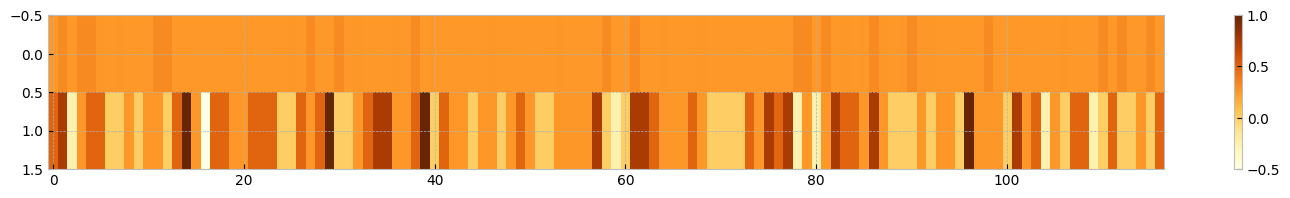

In [99]:
# Segundo estimador
estimador_2 = HuberRegressor(epsilon=1, max_iter=1000)

# train
estimador_2.fit(x_train, y_train)

# predicciones
y_pred_2 = estimador_2.predict(x_test)

# evaluación
mae_est_2 = mean_absolute_error(y_test, y_pred_2)
print("Mean Absolute Error:", mae_est_2)
check_mae(mae_est_2)

# evaluación con métrica adicional
mse_est_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error:", mse_est_2)

predicts(y_pred_2)

Mean Absolute Error: 0.2336840608734866
Mean Squared Error: 0.09036481622786921


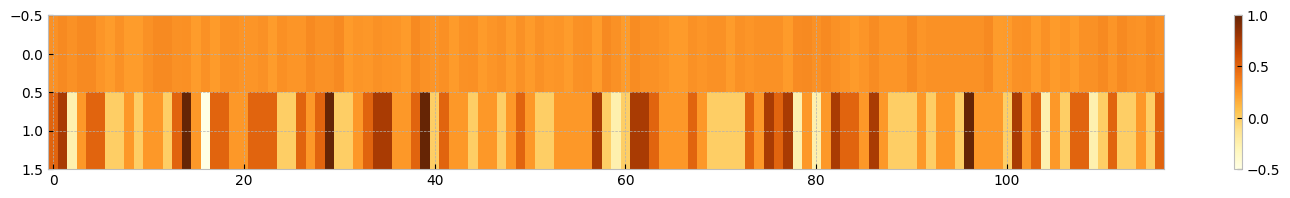

MAE:0.2336840608734866


In [100]:
# Tercer estimador
estimador_3 = Ridge(alpha=100)

# train
estimador_3.fit(x_train, y_train)

# predicciones
y_pred_3 = estimador_3.predict(x_test)

# evaluación
mae_est_3 = mean_absolute_error(y_test, y_pred_3)
print("Mean Absolute Error:", mae_est_3)

# evaluación con métrica adicional
mse_est_3 = mean_squared_error(y_test, y_pred_3)
print("Mean Squared Error:", mse_est_3)

predicts(y_pred_3)
check_mae(mae_est_3)

<font color='#FF8000'>


| MAE antes    | MAE después  | Modelo                   |
|--------------|--------------|--------------------------|
| ``0.237``    | ``0.229``    | HuberRegressor           |
| ``0.242``    | ``0.232``    | RANSACRegressor          |
| ``0.249``    | ``0.233``    | Ridge                    |

<font color='#FF8000'> Como se puede apreciar con la ingenieria de caracteristica mejoran mucho las metricas pero no mejoran las prediciones. Como se ve en las graficas, todavia se esta convergiendo al modelo base. Que mejoren las metricas solo es resultado de haber eliminado un outlier y achicar el rango del indice.

## 4. (Opcional) Replanteando nuestro problema

A lo largo de esta actividad hemos abordado el problema de predecir el índice de creencia. Este índice es muy útil para observar la polarización en las respuestas y analizar aspectos más sútiles de la problemática.

Sin embargo, podríamos simplemente querer predecir si tienen lugar o no dichos sesgos, sin importar su grado, con lo cual podríamos replantear nuestro problema como un problema de clasificación binaria. En este tipo de problemas, el objetivo es predecir si una instancia pertenece a una clase o a otra. En nuestro caso, las dos clases son "presencia de sesgos" y "ausencia de sesgos".


Para hacer esto, podemos modificar nuestra columna con la variable objetivo. Los valores positivos se reemplazarán con la etiqueta $1$, que indicarán la presencia de sesgos. Mientras que, los valores iguales o menores que $0$ se reemplazarán con la etiqueta $0$, que indicarán la ausencia de sesgos.

Como ejercicio opcional, los invitamos a que entrenen un modelo que emplee algoritmos de clasificación para predecir la ausencia o presencia de sesgos de creencia.

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, f1_score

### 4.1 Nueva variable objetivo

In [102]:
y

,indice_creencia_norm
0,0.25
1,0.00
2,0.50
3,0.25
4,0.50
...,...
579,0.50
580,0.25
581,0.50
582,0.50


In [103]:
y_b = (y > 0).astype(int) # Como 1 representa la presencia de sesgo, no se convierte los 0.00 en 1

In [104]:
y_b

,indice_creencia_norm
0,1
1,0
2,1
3,1
4,1
...,...
579,1
580,1
581,1
582,1


In [105]:
x_train_p, x_test_p, y_train_b, y_test_b = train_test_split(x, y_b, train_size=0.9, stratify=y, random_state = 42) # ademas se aumenta el tamaño de los datos de entrenamiento
# para asi tratar de compezar el desbalanceo de clases
print(x_train_p.shape)
print(x_test_p.shape)
print(y_train_b.shape)
print(y_test_b.shape)

(524, 8)
(59, 8)
(524,)
(59,)


In [106]:
x.head() # se utiliza la tabla del punto anterior

,Edad,Género_F,Género_M,Modalidad_Grupal entre sujetos,Modalidad_Resolución Grupal,Modalidad_Resolución Individual,Modalidad_Resolución Individual Post,Modalidad_Resolución Individual Pre
0,18,False,True,False,False,True,False,False
1,23,True,False,False,False,True,False,False
2,20,True,False,False,False,True,False,False
3,25,True,False,False,False,True,False,False
4,20,True,False,False,False,True,False,False


In [107]:
scaler = RobustScaler() # tambien se prueba cambiendo el método de escalado
x_train_b = scaler.fit_transform(x_train_p)
x_test_b = scaler.transform(x_test_p)

### 4.2 Modelos


Arbol de decisión
F1 train Arbol de decisión: 82.620%
F1 test Arbol de decisión: 77.778%


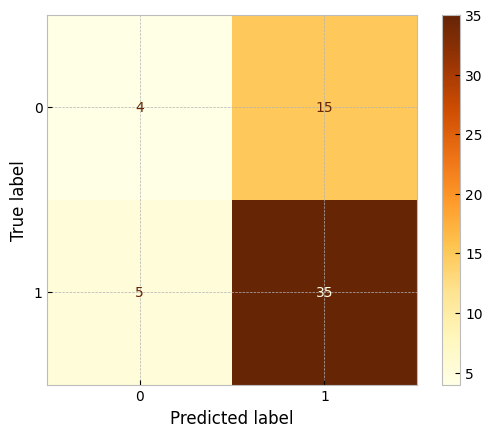

Random Forest
F1 train Random Forest: 83.171%
F1 test Random Forest: 73.563%


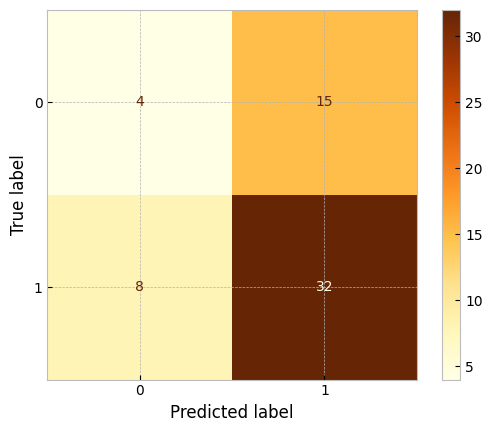

Perceptrón multicapa
F1 train Perceptrón multicapa: 81.395%
F1 test Perceptrón multicapa: 77.083%


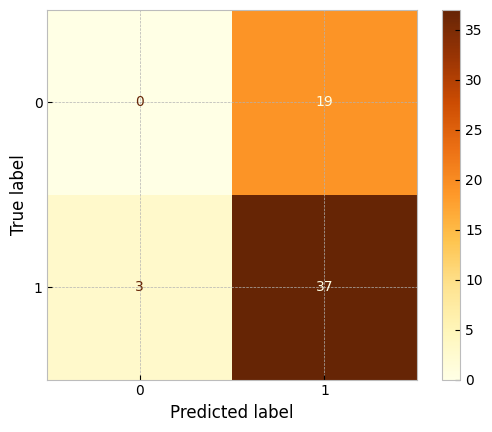

XGBoost
F1 train XGBoost: 82.776%
F1 test XGBoost: 79.121%


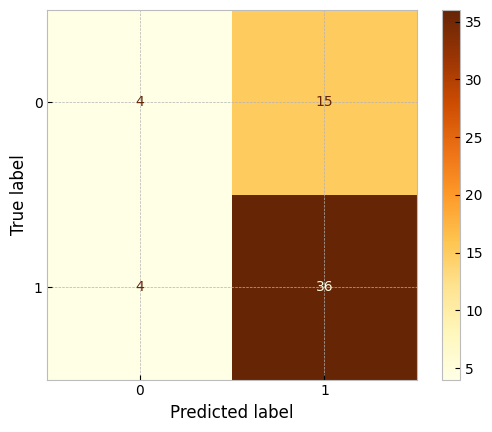

Naive Bayes
F1 train Naive Bayes: 78.388%
F1 test Naive Bayes: 73.333%


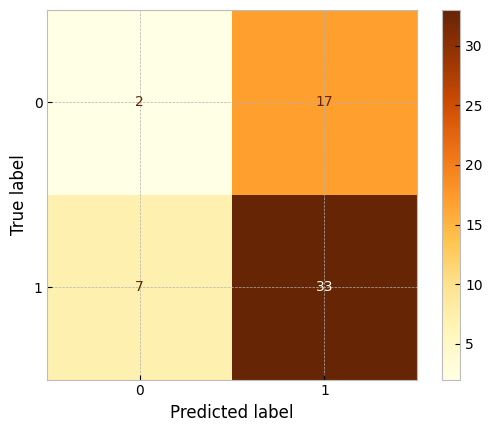

SVM
F1 train SVM: 80.730%
F1 test SVM: 79.592%


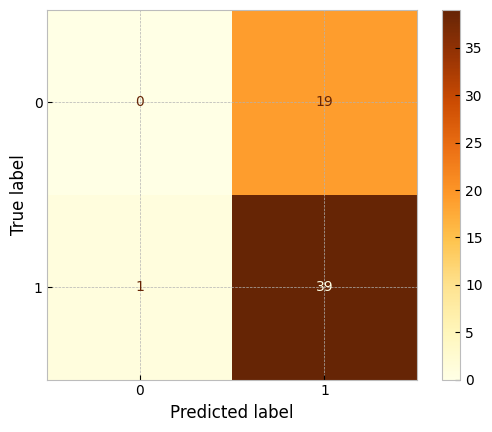

In [108]:
clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []

for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train_b, y_train_b)
    train_predictions = clf.predict(x_train_b)
    f1 = f1_score(y_train_b, train_predictions) # se utiliza f1 por tener clases muy desbalanceadas
    print(f"F1 train {name}: %.3f%%" % (f1 * 100.0))

    test_predictions = clf.predict(x_test_b)
    f1 = f1_score(y_test_b, test_predictions)
    print(f"F1 test {name}: %.3f%%" % (f1 * 100.0))
    trained_models.append(clf)
    accuracy_models.append(f1)
    ConfusionMatrixDisplay.from_predictions(y_test_b, test_predictions, cmap='YlOrBr')
    plt.show()

<font color='#FF8000'> Como se puede apreciar en las matrices de confusión a todos los modelos les cuesta mucho predecir los casos sin sesgo por ser muy pocos en la muestra

### 4.3 Optimización de hiperparámetros

In [109]:
def tune_hyperparameters(model, param_grid, x_train_b, y_train_b):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(x_train_b, y_train_b)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model, best_params

In [110]:
# probando gridserch para el XGBC
xgb_model = XGBClassifier()

xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

xgb_best_model, xgb_best_params = tune_hyperparameters(xgb_model, xgb_param_grid, x_train_b, y_train_b)
xgb_best_params

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

F1 train XGB: 80.909%
F1 test XGB: 80.808%


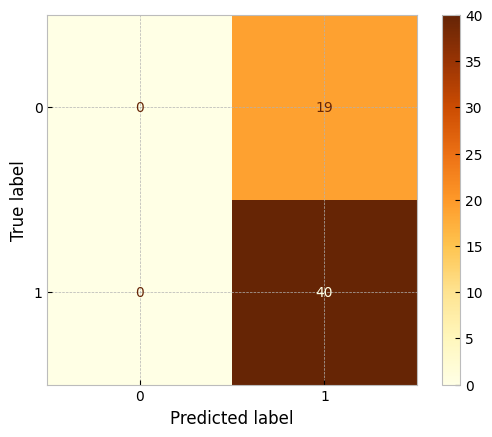

In [112]:
xgb_best_model.fit(x_train_b, y_train_b)
train_predictions = xgb_best_model.predict(x_train_b)
f1 = f1_score(y_train_b, train_predictions) # se utiliza f1 por tener clases muy desbalanceadas
print(f"F1 train XGB: %.3f%%" % (f1 * 100.0))

test_predictions = xgb_best_model.predict(x_test_b)
f1 = f1_score(y_test_b, test_predictions)
print(f"F1 test XGB: %.3f%%" % (f1 * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test_b, test_predictions, cmap='YlOrBr')
plt.show()

In [113]:
# probando gridserch para el DecisionTree
trees_model = DecisionTreeClassifier()

trees_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

trees_best_model, trees_best_params = tune_hyperparameters(trees_model, trees_param_grid, x_train_b, y_train_b)
trees_best_params

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5}

F1 train tree: 81.446%
F1 test tree: 78.261%


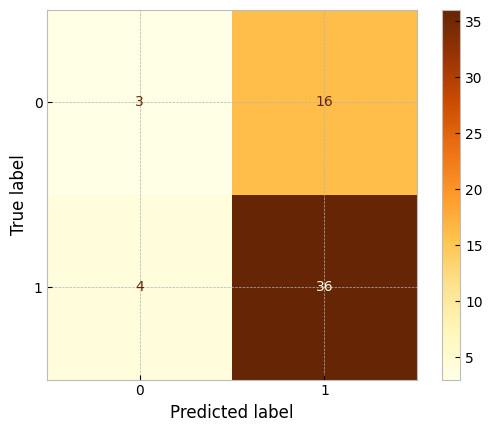

In [114]:
trees_best_model.fit(x_train_b, y_train_b)
train_predictions = trees_best_model.predict(x_train_b)
f1 = f1_score(y_train_b, train_predictions) # se utiliza f1 por tener clases muy desbalanceadas
print(f"F1 train tree: %.3f%%" % (f1 * 100.0))

test_predictions = trees_best_model.predict(x_test_b)
f1 = f1_score(y_test_b, test_predictions)
print(f"F1 test tree: %.3f%%" % (f1 * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test_b, test_predictions, cmap='YlOrBr')
plt.show()

<font color='#FF8000'> Tampoco se logro mejorar las predicciones con el ajuste de hiperparámetros

### 4.4 Clasificación multiclase

In [115]:
y

,indice_creencia_norm
0,0.25
1,0.00
2,0.50
3,0.25
4,0.50
...,...
579,0.50
580,0.25
581,0.50
582,0.50


In [116]:
bins = [-np.inf, -0.375, -0.125, 0.125, 0.375, 0.625, np.inf]
labels = [0, 1, 2, 3, 4, 5]

y_c = pd.cut(y, bins=bins, labels=labels, right=True) #convierte los bins armados en categorias
y_c

,indice_creencia_norm
0,3
1,2
2,4
3,3
4,4
...,...
579,4
580,3
581,4
582,4


In [117]:
x

,Edad,Género_F,Género_M,Modalidad_Grupal entre sujetos,Modalidad_Resolución Grupal,Modalidad_Resolución Individual,Modalidad_Resolución Individual Post,Modalidad_Resolución Individual Pre
0,18,False,True,False,False,True,False,False
1,23,True,False,False,False,True,False,False
2,20,True,False,False,False,True,False,False
3,25,True,False,False,False,True,False,False
4,20,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
579,19,True,False,False,False,False,True,False
580,19,True,False,False,False,False,False,True
581,21,True,False,True,False,False,False,False
582,21,True,False,False,False,False,True,False


In [118]:
x_train_p, x_test_p, y_train_c, y_test_c = train_test_split(x, y_c, train_size=0.9, stratify=y_c, random_state = 42) # ademas se aumenta el tamaño de los datos de entrenamiento
# para asi tratar de conpezar el desbalanceo de clases
print(x_train_p.shape)
print(x_test_p.shape)
print(y_train_c.shape)
print(y_test_c.shape)

(524, 8)
(59, 8)
(524,)
(59,)


In [119]:
scaler = RobustScaler() # tambien se prueba cambiendo el método de escalado
x_train_c = scaler.fit_transform(x_train_p)
x_test_c = scaler.transform(x_test_p)

Arbol de decisión
F1 train Arbol de decisión: 50.000%
F1 test Arbol de decisión: 32.203%


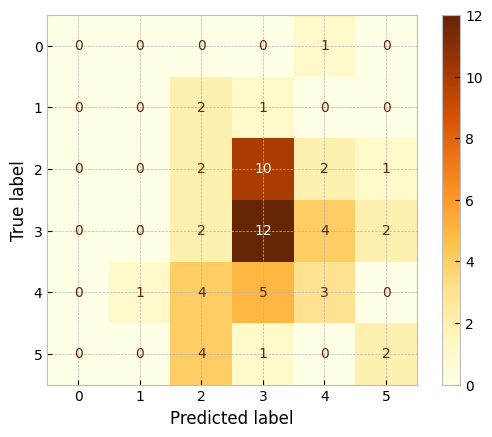

Random Forest
F1 train Random Forest: 50.000%
F1 test Random Forest: 33.898%


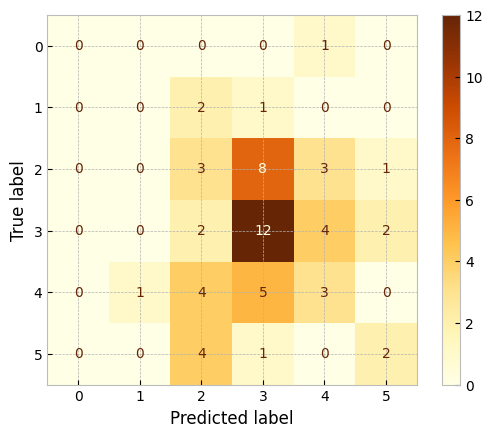

Perceptrón multicapa
F1 train Perceptrón multicapa: 40.649%
F1 test Perceptrón multicapa: 30.508%


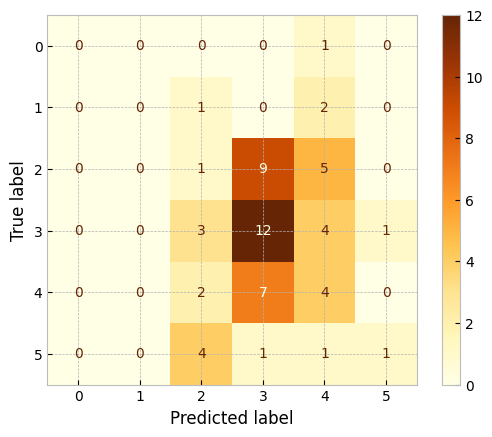

XGBoost
F1 train XGBoost: 50.000%
F1 test XGBoost: 32.203%


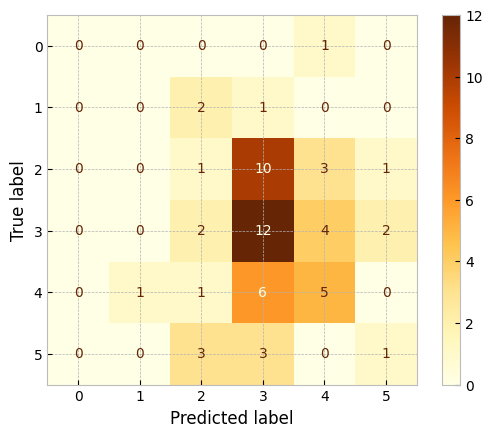

Naive Bayes
F1 train Naive Bayes: 17.557%
F1 test Naive Bayes: 23.729%


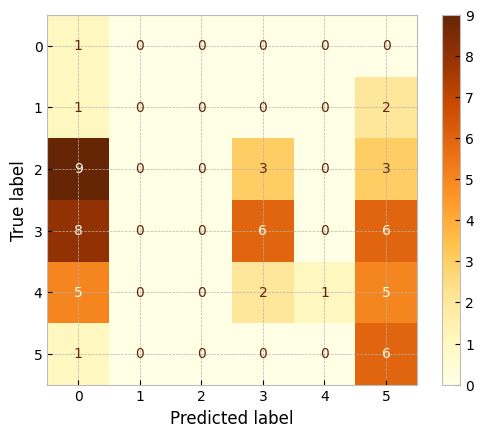

SVM
F1 train SVM: 38.550%
F1 test SVM: 25.424%


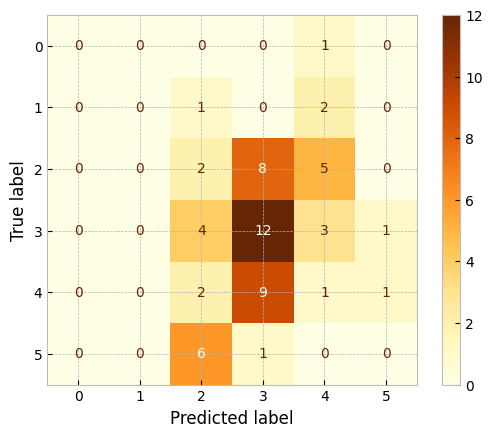

In [120]:
clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []

for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train_c, y_train_c)
    train_predictions = clf.predict(x_train_c)
    f1 = f1_score(y_train_c, train_predictions, average= 'micro') # se utiliza f1 por tener clases muy desbalanceadas
    print(f"F1 train {name}: %.3f%%" % (f1 * 100.0))

    test_predictions = clf.predict(x_test_c)
    f1 = f1_score(y_test_c, test_predictions, average= 'micro')
    print(f"F1 test {name}: %.3f%%" % (f1 * 100.0))
    trained_models.append(clf)
    accuracy_models.append(f1)
    ConfusionMatrixDisplay.from_predictions(y_test_c, test_predictions, cmap='YlOrBr')
    plt.show()

In [121]:
np.unique(y_train_c, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([  4,  29, 135, 172, 118,  66]))

In [122]:
np.unique(y_test_c, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 1,  3, 15, 20, 13,  7]))

<font color='#FF8000'> Finalmente en la clasificación multiclase se puede apreciar como el desbalance de los datos sigue complicando mucho el problema, ademas de por si se tienen pocos datos de cada clase y estos modelos necesitarian muchos más datos para poder generar mejores predicciones.

## 5. Informe

# <font color='#FF8000'> <center> **RESULTADOS**

---
<font color='#FF8000'>En este último trabajo se desarrollaron varios modelos de predicción para intentar predecir el índice de creencia de un un individuo y así calificar su sesgo de creencia.

---

## Desarrollo

<font color='#FF8000'> Aunque trabajos anteriores se decidió descartar las variables género y edad, se eligió tenerlas en el data frame para tener más información con la cual predecir. Además, al principio, se decidió entrenar con las columnas de modalidad y género con one hot encoding, edad y  VxC con codificación ordinal. Se descartaron las columnas de aceptación porque están directamente relacionadas con el target y las columnas de correctas por también por su redundancia con validez y aceptación.

<font color='#FF8000'> Para la evaluación de las predicciones se utilizaron las métricas MAE y MSE, aunque para realmente ver el desempeño del modelo se generaron gráficas en las que se representa a cada elemento del conjunto predicho y del de testeo como una barra del color que representa su índice de creencia, la parte superior es la predicción y la inferior el valor real, como se puede ver en la siguiente imagen aplicada a las predicciones generadas por el dummy regresor (que sólo calcula la media).

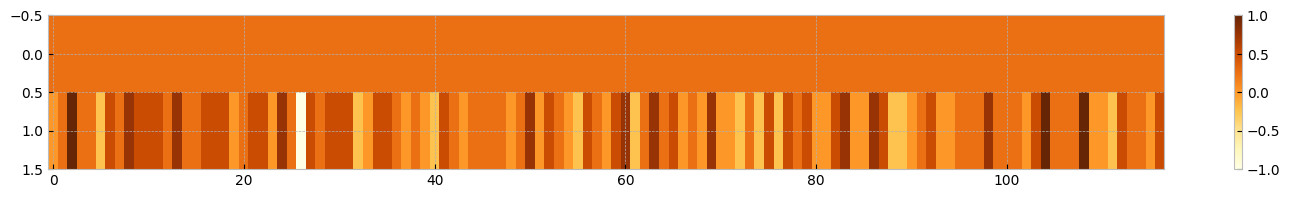


## Resultados
<font color='#FF8000'> Luego de probar con varios regresores se eligió continuar con con HuberRegressor, Ridge y RANSACRegressor porque se consideró que tienen potencial de mejora. Una cosa que cabe destacar es que se llegó a la conclusión de que estos modelos como estan llegan a las mejores métricas cuando convergen a un resultado similar al dummy_regr, como se puede ver en la gráfica de HuberRegressor, el cual fue el modelo con menor MAE y tiene el siguiente gráfico de estudio:

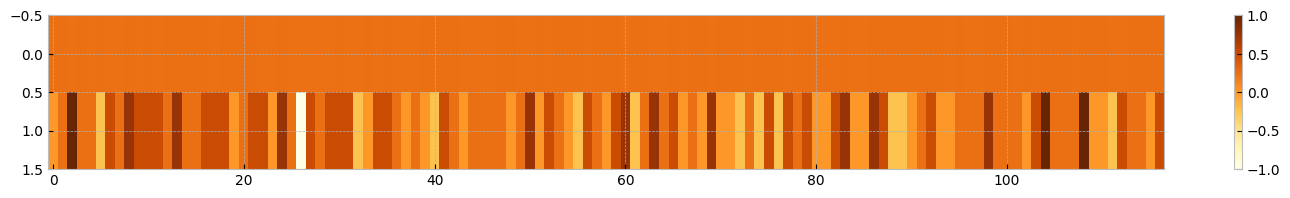

<font color='#FF8000'>

| MAE          | Modelo                   |
|--------------|--------------------------|
| ``0.237``    | HuberRegressor           |
| ``0.242``    | RANSACRegressor          |
| ``0.246``    | DecisionTreeRegressor    |
| ``0.246``    | Lasso                    |
| ``0.246``    | ElasticNet               |
| ``0.246``    | BayesianRidge            |
| ``0.249``    | Ridge                    |
| ``0.251``    | LinearRegression         |
| ``0.252``    | RandomForestRegressor    |
| ``0.252``    | AdaBoostRegressor        |
| ``0.253``    | PolynomialRegression     |
| ``0.255``    | GradientBoostingRegressor|

<font color='#FF8000'> Como se puede apreciar en la tabla la etapa de optimización no aportó ninguna mejora en las predicciones. En general el efecto fue que los modelos intentaron predecir más otros valores (como se ve en la gráfica de Huber optimizado) pero eso a su vez empeoró las métricas.

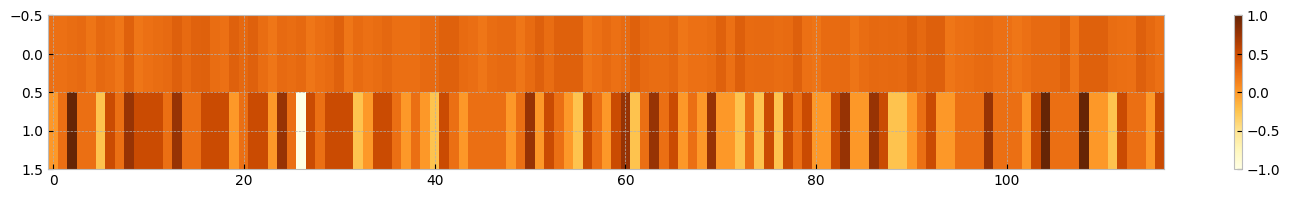

<font color='#FF8000'>

| MAE antes    | MAE después  | Modelo                   |
|--------------|--------------|--------------------------|
| ``0.237``    | ``0.249``    | HuberRegressor           |
| ``0.242``    | ``0.251``    | RANSACRegressor          |
| ``0.249``    | ``0.249``    | Ridge                    |

## Ingeniería de características

<font color='#FF8000'> En esta etapa se realizaron varios cambios en los datos:

1.   Se elimina al participante 56 que tiene el único valor de índice -1.
1.   Se eliminan las columnas VxC, ya que son constantes para todas las filas, por lo que no aportan información útil.
1.   En train_test_split se incluyó stratify=y para que los datos de testeo tengan la misma distribución que los de entrenamiento.
1.   Se cambia el método de escalado a escaladoRobustScaler()

<font color='#FF8000'> Con estos cambios mejoraron mucho las métricas pero no mejoran las predicciones. Como se puede apreciar en la gráfica de las predicciones de Hubber. Las mejores métricas se obtienen convergiendo al modelo base. Entonces esta mejora sólo es resultado de haber eliminado un outlier y achicar el rango del índice, no de realmente tener mejores predicciones.

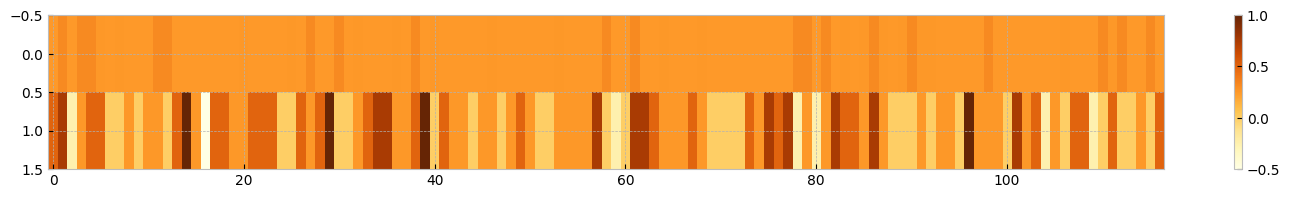

<font color='#FF8000'>

| MAE antes    | MAE después  | Modelo                   |
|--------------|--------------|--------------------------|
| ``0.237``    | ``0.229``    | HuberRegressor           |
| ``0.242``    | ``0.232``    | RANSACRegressor          |
| ``0.249``    | ``0.233``    | Ridge                    |

## Clasificación

<font color='#FF8000'>Al replantear el problema convirtiéndolo a clasificación binaria se cambió todos los valores de índice mayores a 0 al valor 1 que representa la presencia de sesgo y los demás se los transformó a 0 representando su ausencia. Además se aumentó la cantidad de datos para entrenar a 90% del dataset.
<font color='#FF8000'>Con estos cambios y el preprocesamiento de la etapa anterior se consiguieron los datos para entrenar una serie de modelos de clasificación. El supuesto mejor resultado fue el dado por el árbol de decisión que dio un F1 score de 77,7 y la siguiente matriz de confusión.

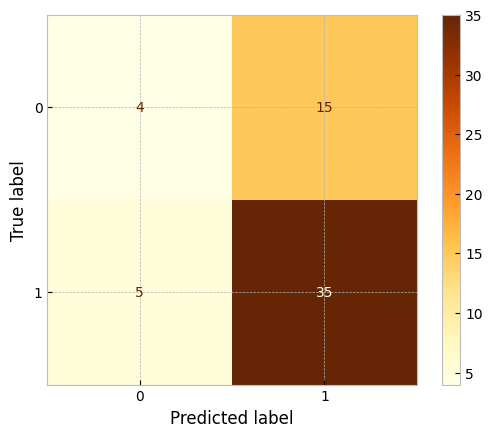

<font color='#FF8000'> Claramente el modelo está afectado por el desbalance y tiende hacia el valor que más se repite, es decir el 1 y por esta razón predice prácticamente todos los ejemplos como con sesgo. Se intentó optimizar los hiperparámetros pero lo que se obtiene es mejorar las predicciones de 1 pero a costa de empeorar todavía más las de 0 como se ve en la siguiente matriz de confusión.

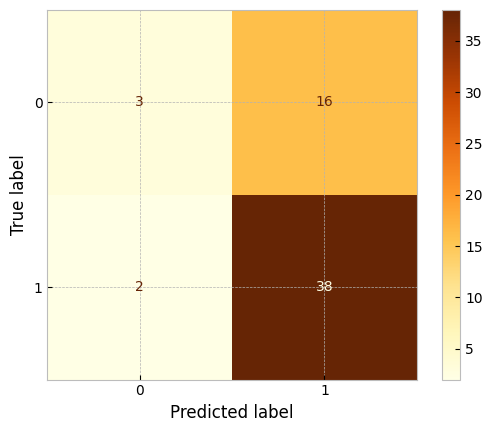

<font color='#FF8000'> Por último se probó convirtiendo el problema en una clasificación multiclase. Como se sospechaba en un principio la cantidad de datos no era suficiente para entrenar estos modelos pero de todas formas se decidió probar. En la siguiente matriz de confusión se muestra las mejores predicciones, obtenidas con el perceptrón multicapa.

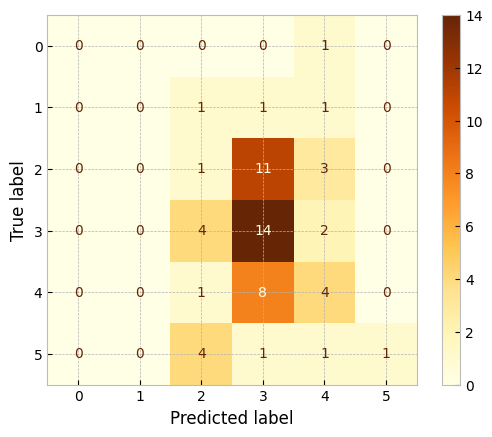

## Conclusiones

><font color='#FF8000'>Luego de probar varias técnicas y modelos se puede llegar a la conclusión que para conseguir mejores predicciones serían necesarios muchos más participantes, si es que existe algún patrón que reconocer, porque también puede ser que en realidad con las columnas que se tienen no se pueda generar buenas predicciones. Por lo tanto, otro cambio que se podría hacer es recolectar más datos de los participantes, para tener más características con las que trabajar.
